In [1]:
library(SingleCellExperiment)
library(Seurat)
library(mclust)
library(dplyr)

Loading required package: SummarizedExperiment
Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsp

In [2]:
pdata <- readRDS("source/prdata.sagar")

In [3]:
seuset <- CreateSeuratObject(
    raw.data = pdata,
    min.cells = 3, 
    min.genes = 200
)

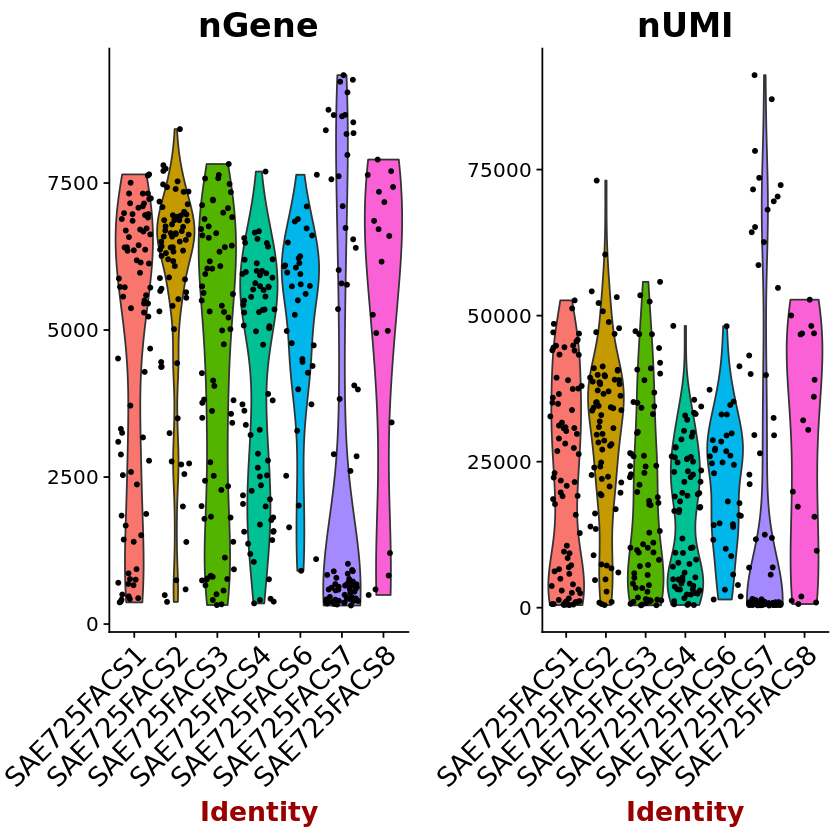

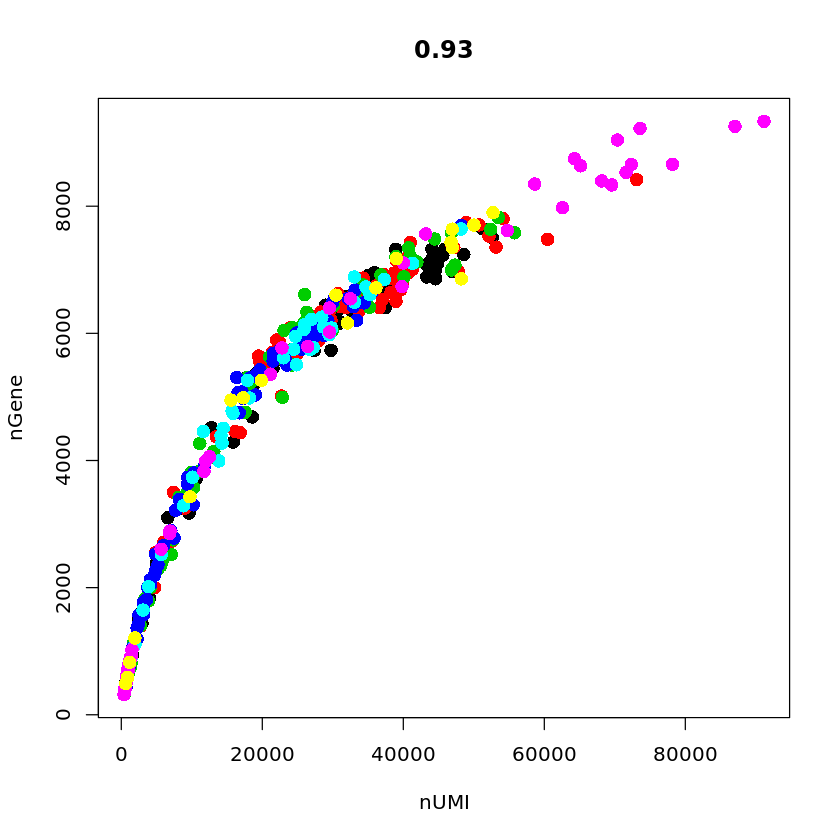

In [7]:
VlnPlot(
    object = seuset, 
    features.plot = c("nGene", "nUMI"),
    x.lab.rot = 90,
    nCol = 2
)

# Most counts are 0 except in Batch 6 where it's more spread.
# Batch 7 has some bias for low number of genes
GenePlot(
    object = seuset, 
    gene1 = "nUMI", 
    gene2 = "nGene"
)

In [8]:
dim(seuset@data)

[1] 16195   430

In [9]:
seuset_f <- FilterCells(
    object = seuset, 
    subset.names = c("nUMI"), 
    high.thresholds = c(2e7),
    low.thresholds = c(3000)
)

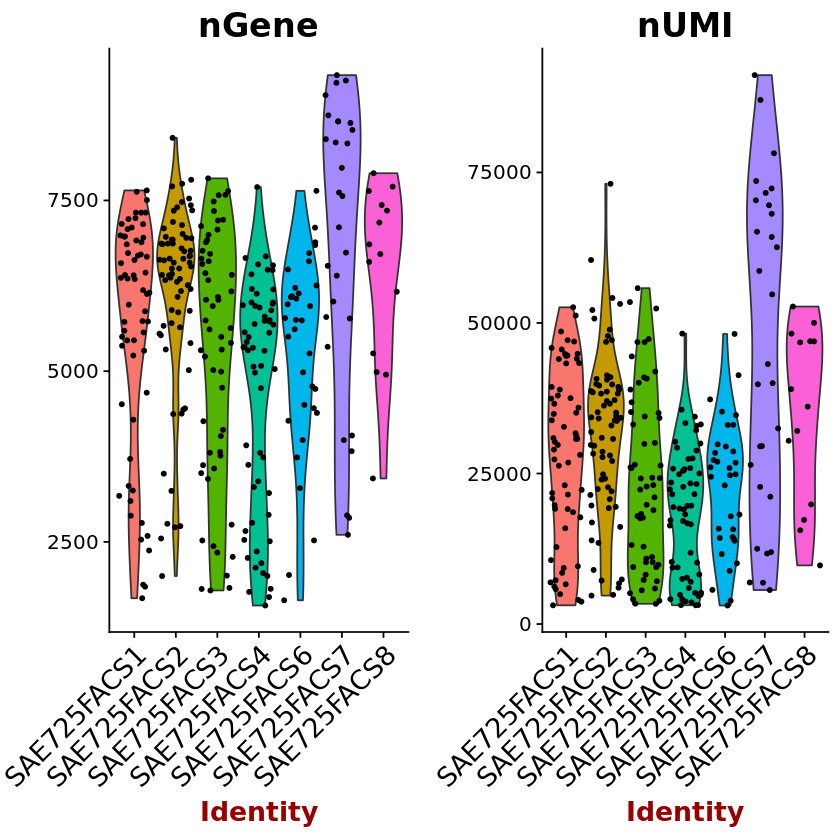

[1] 16195   326

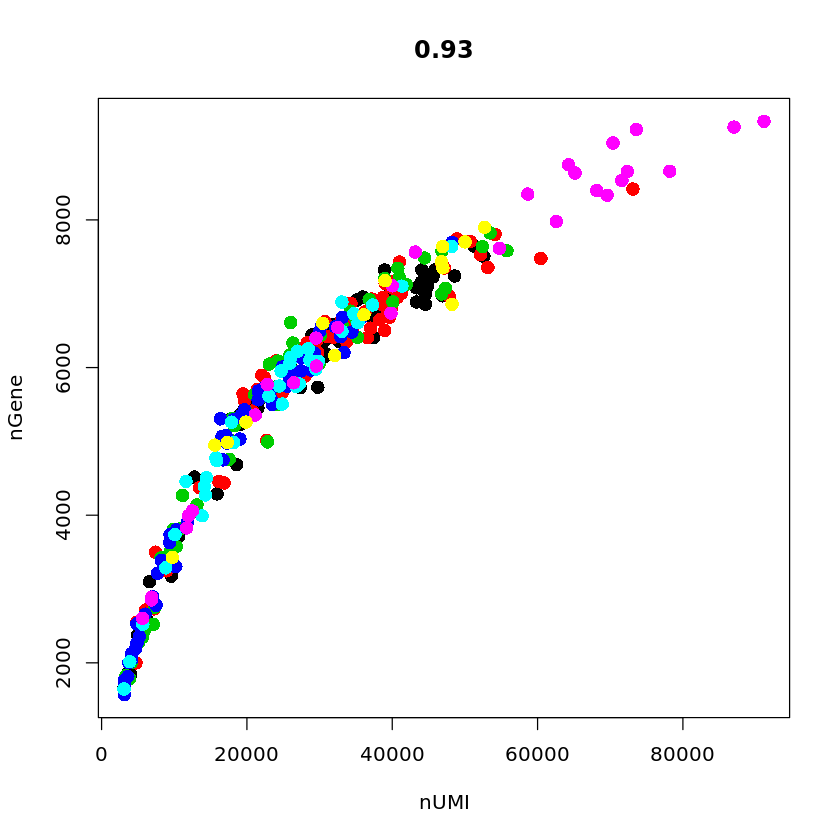

In [10]:
VlnPlot(
    object = seuset_f, 
    features.plot = c("nGene", "nUMI"),
    x.lab.rot = 90,
    nCol = 2
)

GenePlot(
    object = seuset_f, 
    gene1 = "nUMI", 
    gene2 = "nGene"
)

dim(seuset_f@data)

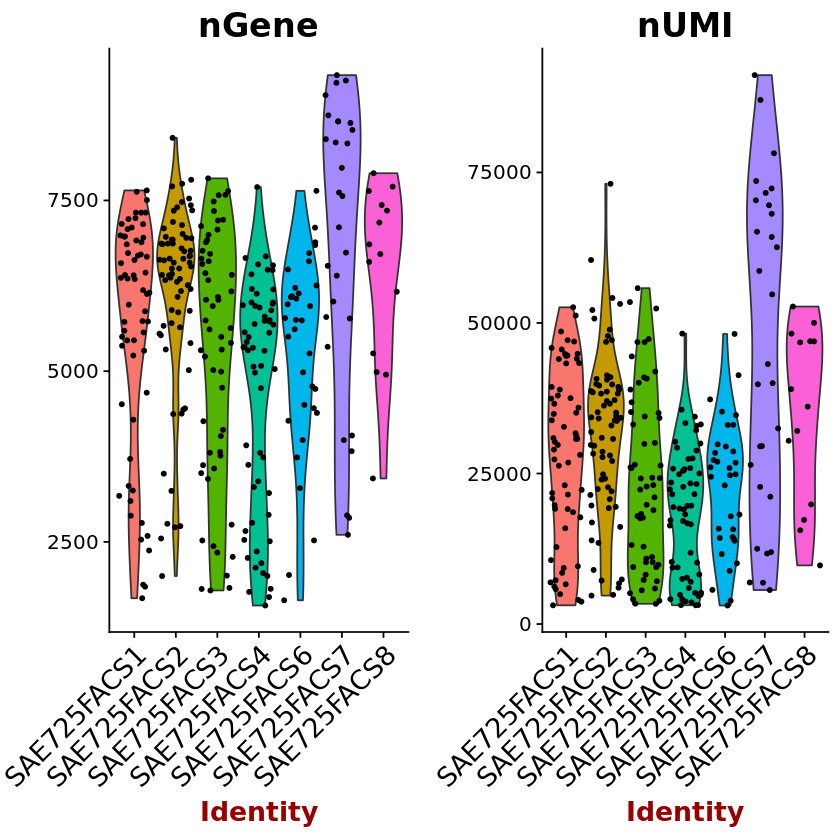

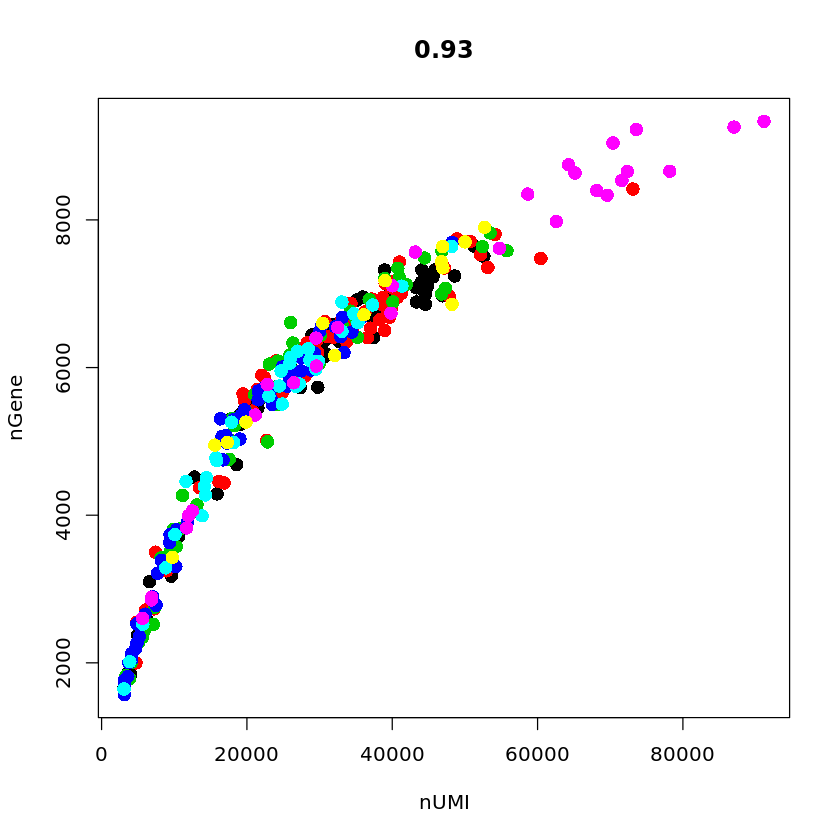

In [11]:
seuset_n <- NormalizeData(
    object = seuset_f, 
    normalization.method = "LogNormalize", 
    scale.factor = 10000
)

VlnPlot(
    object = seuset_n, 
    features.plot = c("nGene", "nUMI"),
    x.lab.rot = 90,
    nCol = 2
)

GenePlot(
    object = seuset_n, 
    gene1 = "nUMI", 
    gene2 = "nGene"
)

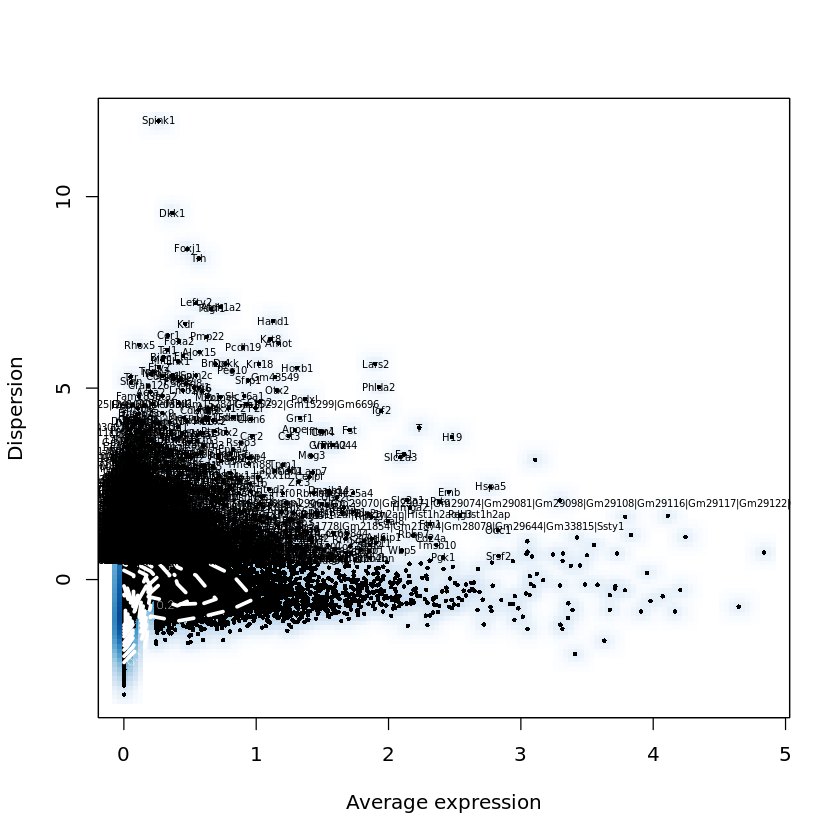

In [12]:
seuset_fvg <- FindVariableGenes(
    object = seuset_n,
    mean.function = ExpMean, 
    dispersion.function = LogVMR, 
    x.low.cutoff = 0.0125, 
    x.high.cutoff = 3, 
    y.cutoff = 0.5
)

In [13]:
length(x = seuset_fvg@var.genes)

seuset_sd <- ScaleData(
    object = seuset_fvg, 
    vars.to.regress = c("nUMI")
)

[1] 3452

[1] "Regressing out nUMI"
  |======================================================================| 100%
Time Elapsed:  36.932843208313 secs
[1] "Scaling data matrix"
  |======================================================================| 100%


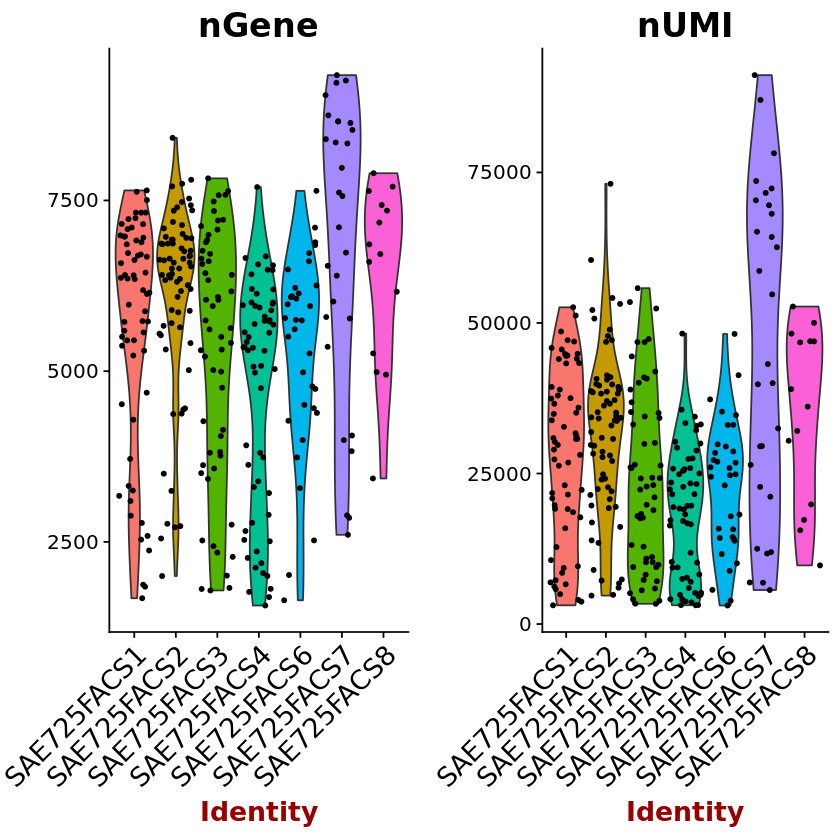

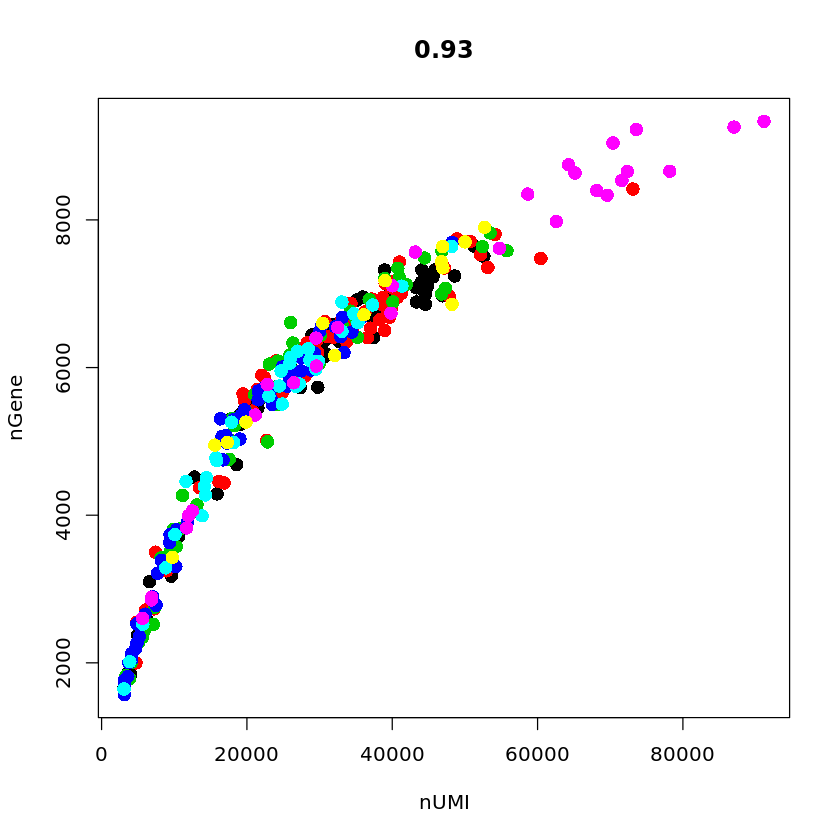

In [14]:
VlnPlot(
    object = seuset_sd, 
    features.plot = c("nGene", "nUMI"),
    x.lab.rot = 90,
    nCol = 2
)

GenePlot(
    object = seuset_sd, 
    gene1 = "nUMI", 
    gene2 = "nGene"
)

In [18]:
seuset_pca <- RunPCA(
    object = seuset_sd,
    pc.genes = seuset_sd@var.genes,
    do.print = TRUE,
    pcs.print = 1:9,
    genes.print = 5
)

[1] "PC1"
[1] "Srsf2" "Srm"   "Rrm2"  "Snhg1" "H19"  
[1] ""
[1] "Dnajb13"       "Fam183b"       "Pifo"          "Cfap126"      
[5] "1110017D15Rik"
[1] ""
[1] ""
[1] "PC2"
[1] "Igf2"  "H19"   "Rbms1" "Peg10" "Ppic" 
[1] ""
[1] "Pim2"   "Sox2"   "Cdh1"   "Pou5f1" "Zic5"  
[1] ""
[1] ""
[1] "PC3"
[1] "Hoxb1" "Meis2" "Tbx6"  "Fst"   "Dll3" 
[1] ""
[1] "Podxl"  "Slc2a3" "Cgnl1"  "Car4"   "Cldn6" 
[1] ""
[1] ""
[1] "PC4"
[1] "Slc2a3" "Meg3"   "Vangl1" "Iqgap1" "B3gnt7"
[1] ""
[1] "Foxc2"  "Rps27l" "Twist1" "Crabp1" "Irx1"  
[1] ""
[1] ""
[1] "PC5"
[1] "Pgk1"    "Akap12"  "Bex4"    "B4galt5" "Nkx1-2" 
[1] ""
[1] "Cer1"   "Spink1" "Eda"    "Hnf1b"  "Lcp1"  
[1] ""
[1] ""
[1] "PC6"
[1] "Basp1"  "Tmem88" "Spin2c" "Pmp22"  "Msx2"  
[1] ""
[1] "Tal1"  "Lmo2"  "Gfi1b" "Gata2" "Gata1"
[1] ""
[1] ""
[1] "PC7"
[1] "4933438K21Rik" "Gm43484"       "Cep112it"      "BE692007"     
[5] "8030462N17Rik"
[1] ""
[1] "Rbbp7"  "Cd24a"  "Ifitm3" "Tomm7"  "Tbca"  
[1] ""
[1] ""
[1] "PC8"
[1] "Scd2"    "Fgfr1"   

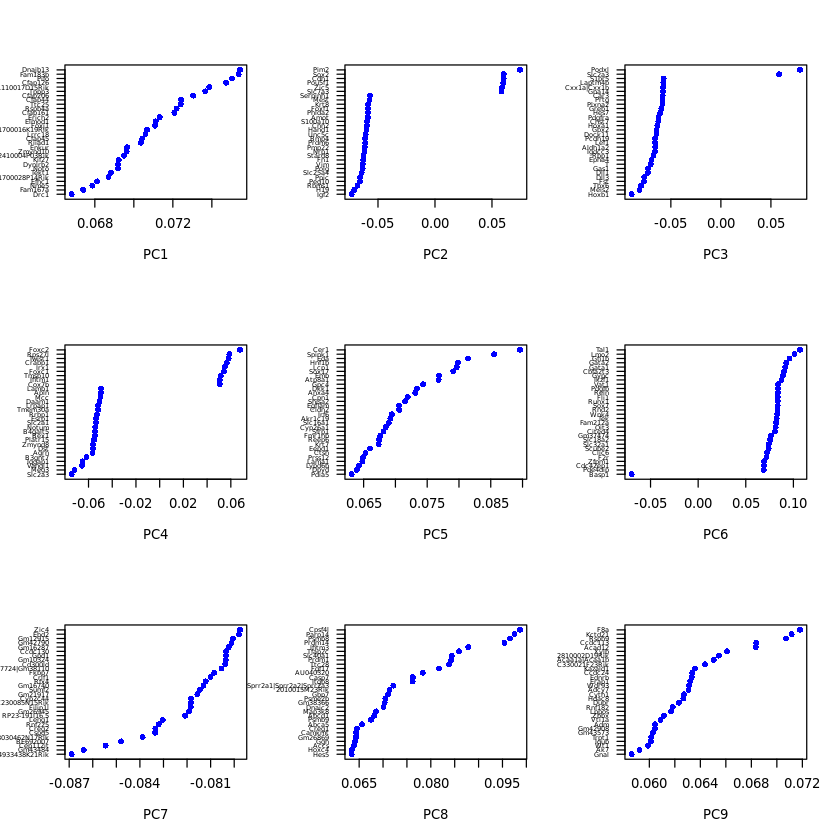

In [19]:
#PrintPCA(object = seuset_pca, pcs.print = 1:5, genes.print = 5, use.full = FALSE)
VizPCA(object = seuset_pca, pcs.use = 1:9)

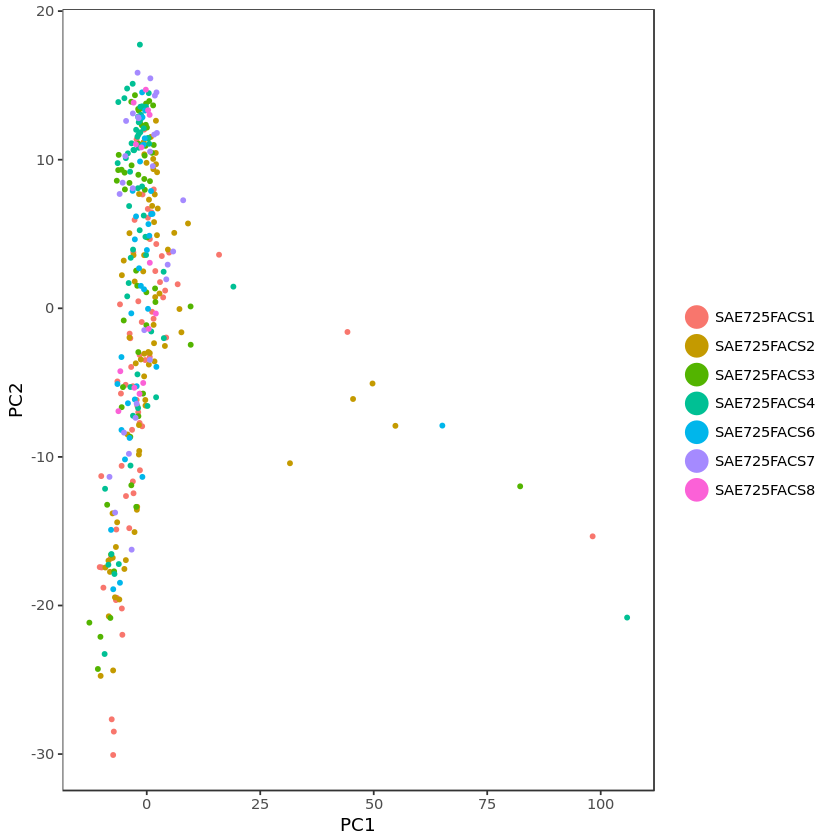

In [20]:
PCAPlot(object = seuset_pca, dim.1 = 1, dim.2 = 2, num.genes = 500)

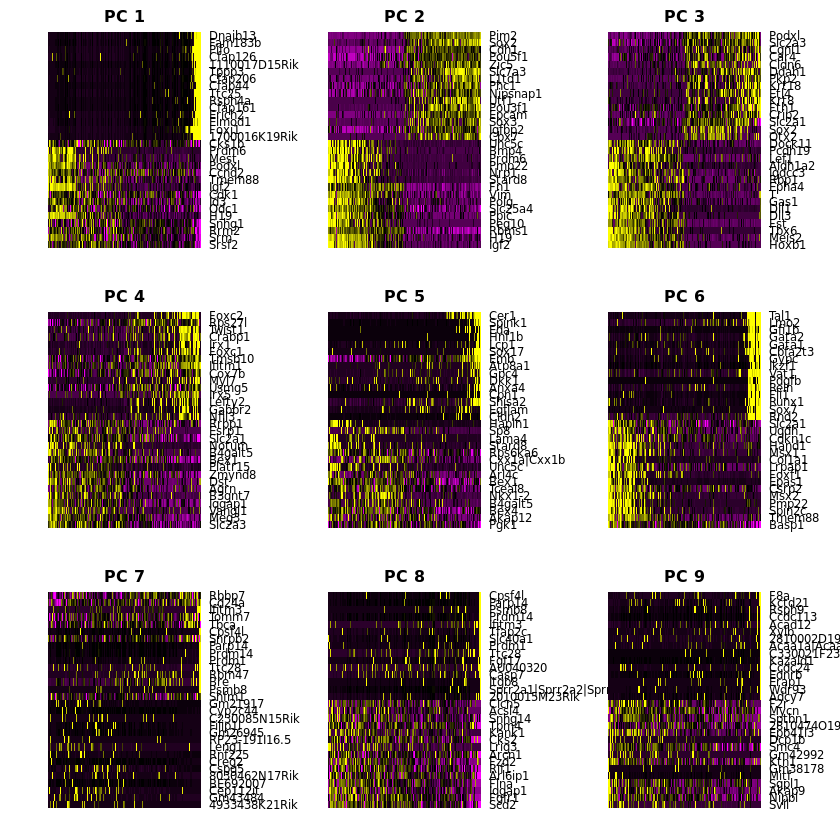

In [21]:
PCHeatmap(
    object = seuset_pca, 
    pc.use = 1:9, 
    cells.use = 200, 
    do.balanced = TRUE, 
    label.columns = FALSE,
    use.full = FALSE
)

In [22]:
seuset_js <- JackStraw(
    object = seuset_pca,
    num.replicate = 100, 
)

  |======================================================================| 100%
Time Elapsed:  1.27213962475459 mins 



Warning message:
“Removed 22221 rows containing missing values (geom_point).”

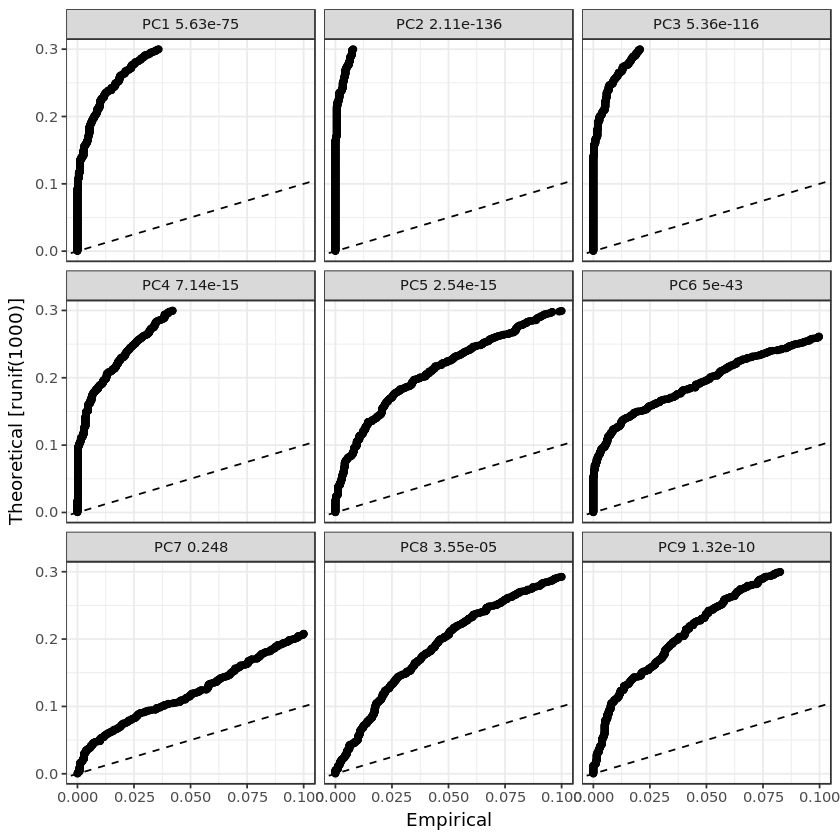

In [23]:
JackStrawPlot(object = seuset_js, PCs = 1:9)

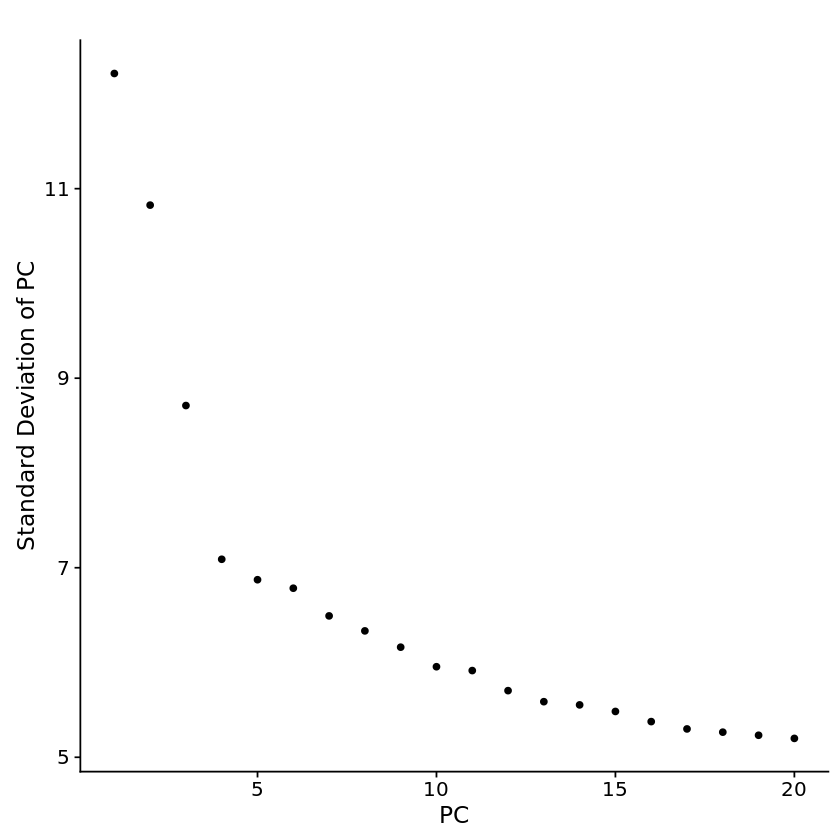

In [24]:
# PCs 1-3 v sig, PCs 4-6 less so
PCElbowPlot(object = seuset_js)
# Elbow shows that 4th PC is the cutoff

In [25]:
limrange=2:10

seu_filts <- list()

for (lim in limrange){
    seu_filts[[lim]] <- FindClusters(
        object = seuset_js, 
        reduction.type = "pca", 
        dims.use = 1:lim, 
        resolution = 1.0, 
        print.output = 0, 
        save.SNN = TRUE
    )
    cat(lim)
}

tab_filts <- list()

for (lim in limrange){
    seu <- seu_filts[[lim]]
    tab_filts[[lim]] <- table(seu@ident)
}


2345678910

In [26]:
tab <- rbind(
    rbind(lapply(tab_filts, function(x) length(names(x)))),
    rbind(tab_filts)
)
          
colnames(tab) <- c(1,limrange)        
rownames(tab) <- c("Number of clusters", "Freq. clusters")


In [27]:
t(tab)

Number of clusters Freq. clusters            
1  0                  NULL                      
2  5                  81, 72, 66, 59, 48        
3  7                  59, 53, 50, 49, 49, 43, 23
4  4                  110, 85, 76, 55           
5  5                  98, 83, 72, 58, 15        
6  5                  100, 80, 72, 57, 17       
7  6                  78, 72, 70, 57, 34, 15    
8  5                  97, 83, 70, 57, 19        
9  5                  96, 84, 70, 58, 18        
10 6                  77, 71, 66, 57, 40, 15

In [28]:
limrange=2:10
generateTSNEs <- function(){
    
    seu_tsnes <- list()

    for (lim in limrange){
        seu <- seu_filts[[lim]]
        seu_tsnes[[lim]] <- RunTSNE(
            object = seu,
            dims.use = 1:lim,
            do.fast = TRUE
        )
    }
    return(seu_tsnes)
}

In [29]:
tsnes_dim <- generateTSNEs()

# Checkpoint!

In [30]:
# Save here and checkpoint
saveRDS(seu_filts, "seu_filts.3.rds")
saveRDS(tab_filts, "tab_filts.3.rds")
saveRDS(tsnes_dim, "tsnes_dim.3.rds")

In [6]:
library(SingleCellExperiment)
library(Seurat)
library(mclust)
library(dplyr)
seu_filts <- readRDS("seu_filts.3.rds")
tab_filts <- readRDS("tab_filts.3.rds")
tsnes_dim <- readRDS("tsnes_dim.3.rds")

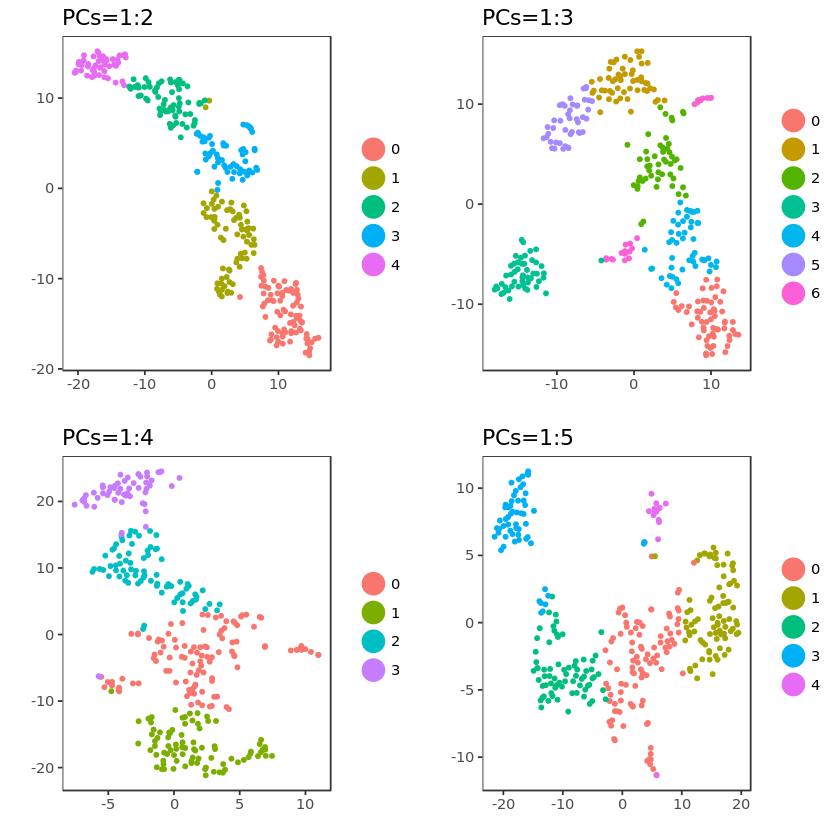

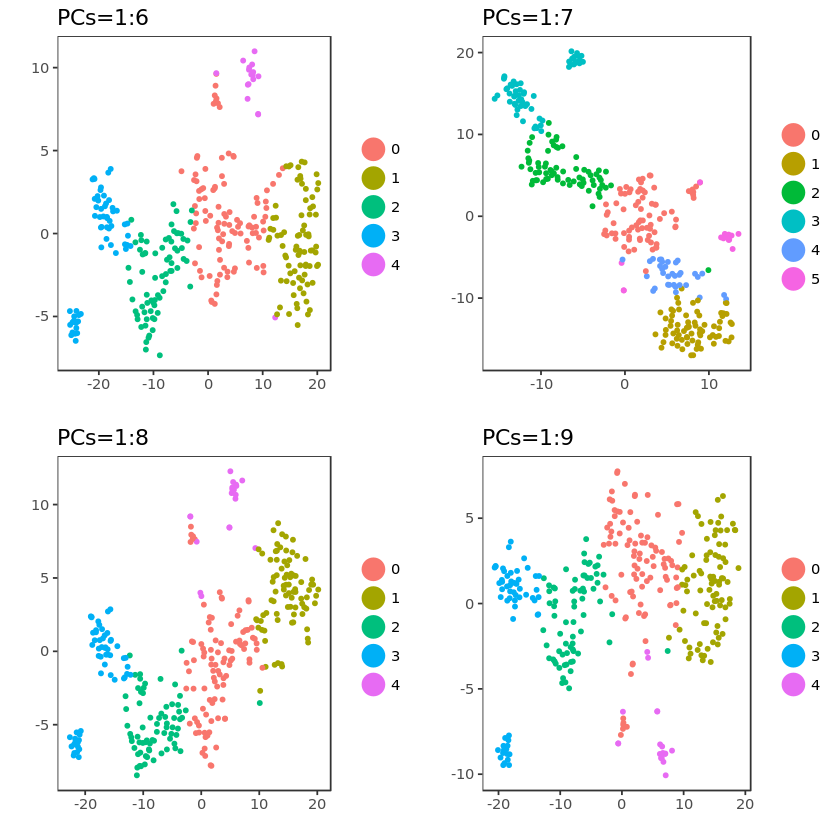

In [31]:
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)){
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- t(matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = ceiling(numPlots/cols), nrow = cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

printInteresting <- function(seu_list, range){

    multiplot(plotlist = (
        lapply(range, function(x){
            seu <- seu_list[[x]]
            return(TSNEPlot(
                object = seu, 
                do.return = T,
                label.size = 0.1
            ) + ggtitle(paste("PCs=1:",x, sep="")) + xlab("") + ylab(""))
        })
    ), cols=2
    )
}

printInteresting(tsnes_dim, 2:5)
printInteresting(tsnes_dim, 6:9)
#printInteresting(tsnes_dim, c(10,NULL))

In [32]:
marker_list <- list()

for (lim in limrange){
    marker_list[[lim]] <- FindAllMarkers(
        object = tsnes_dim[[lim]], 
        only.pos = TRUE, 
        min.pct = 0.25, 
        thresh.use = 0.25
    )
}


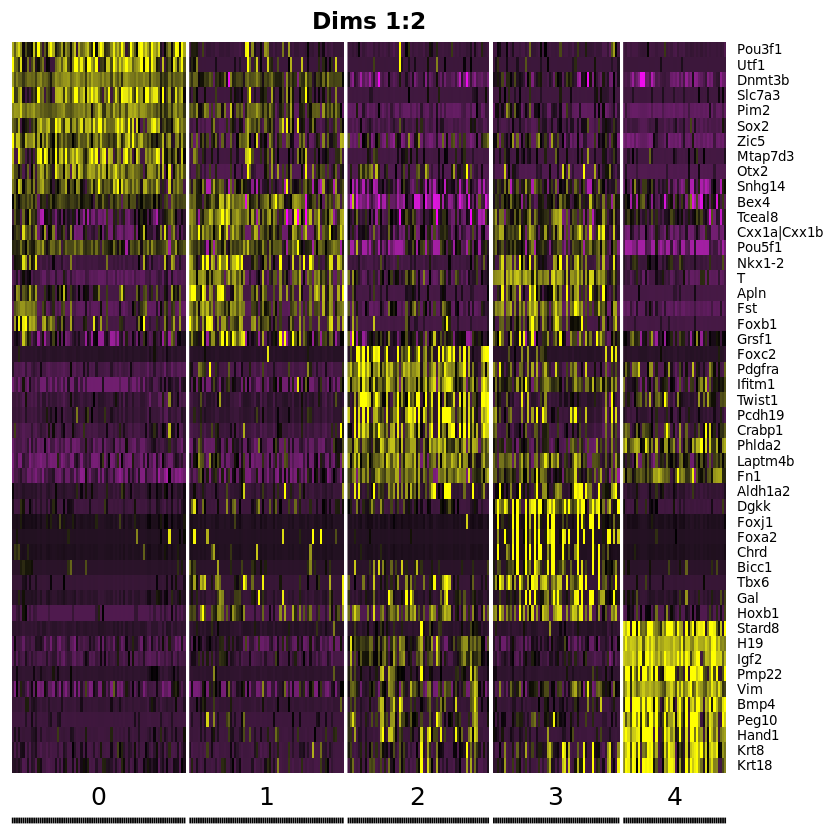

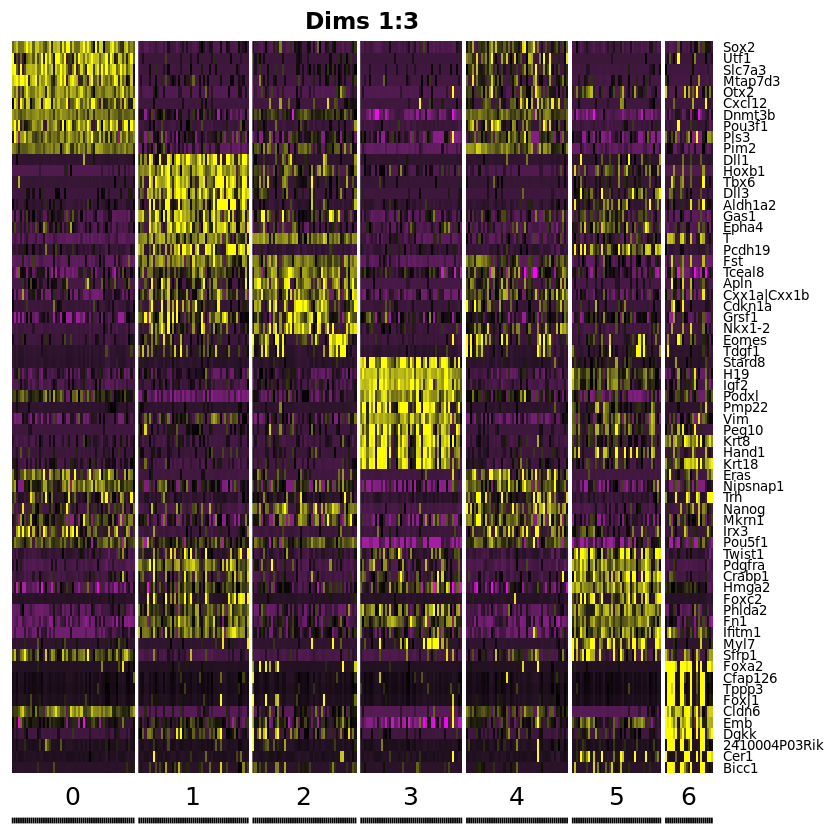

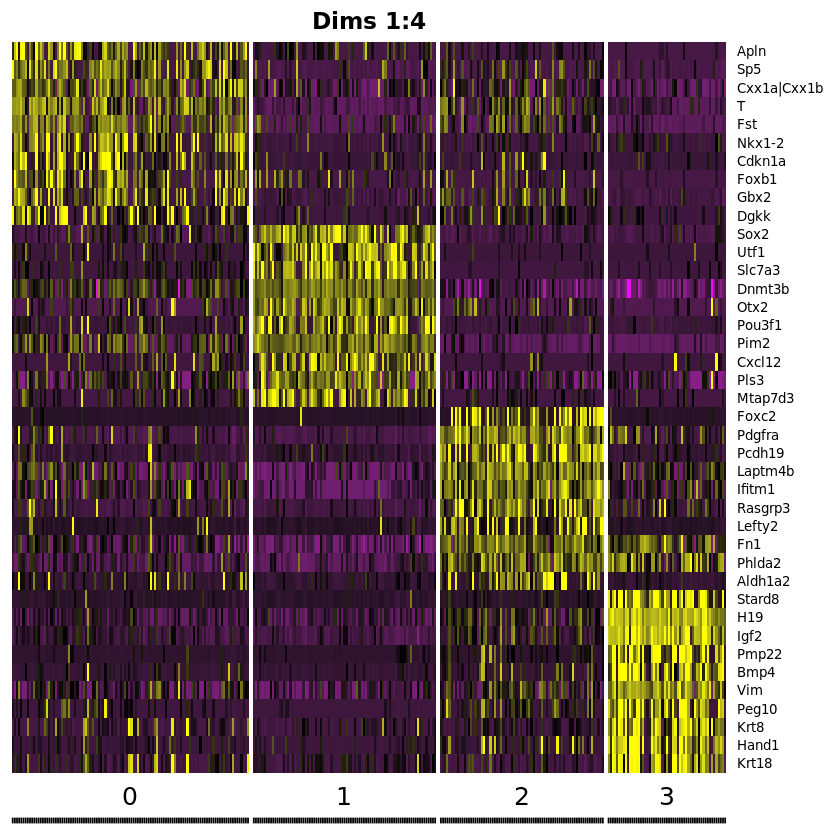

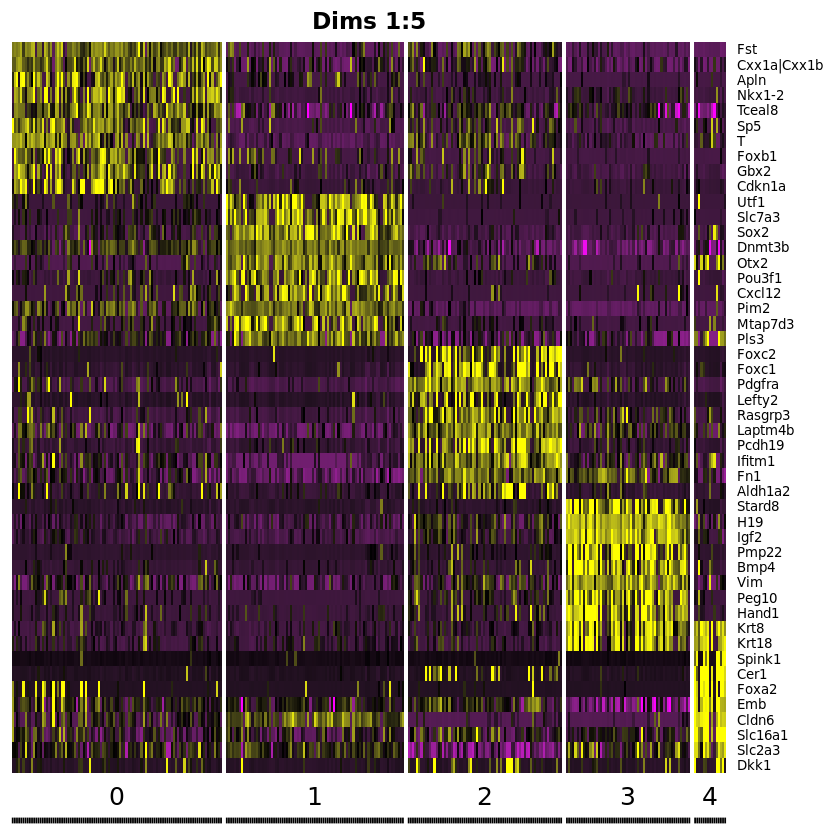

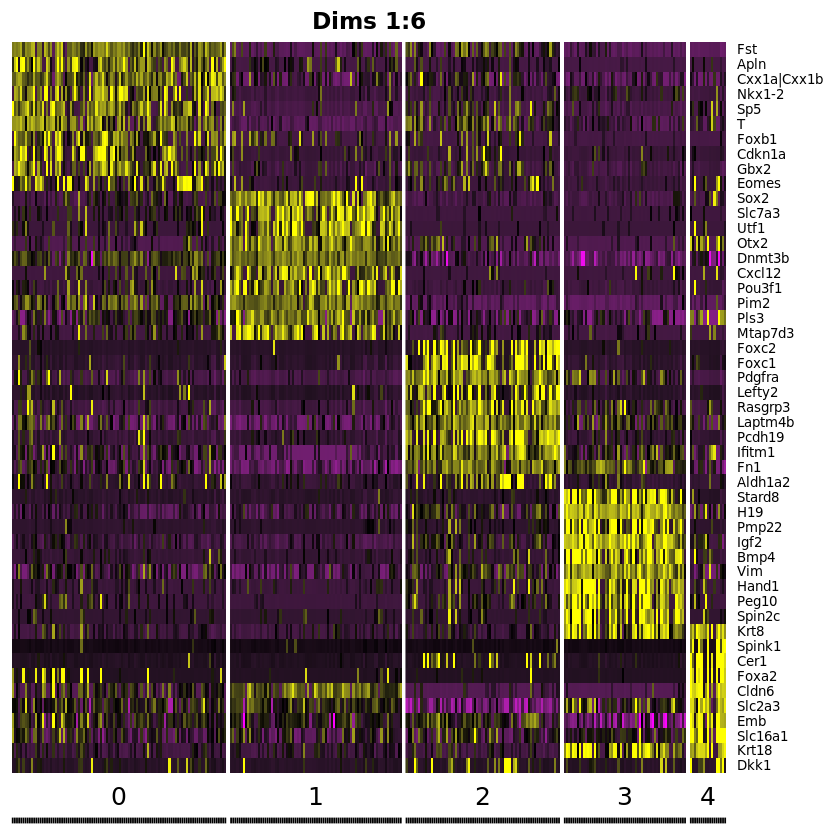

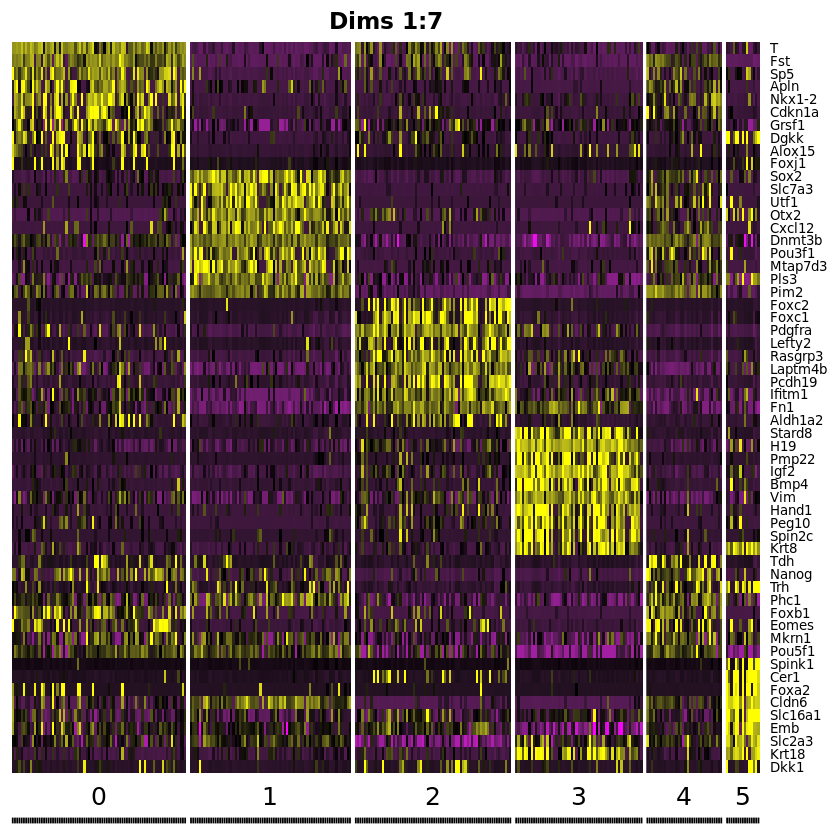

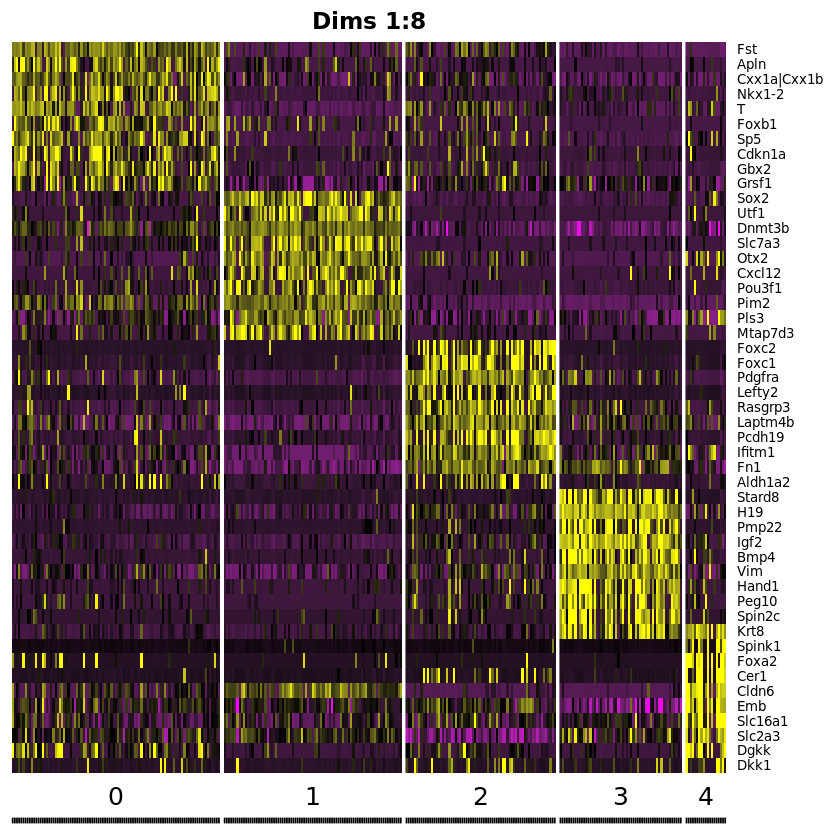

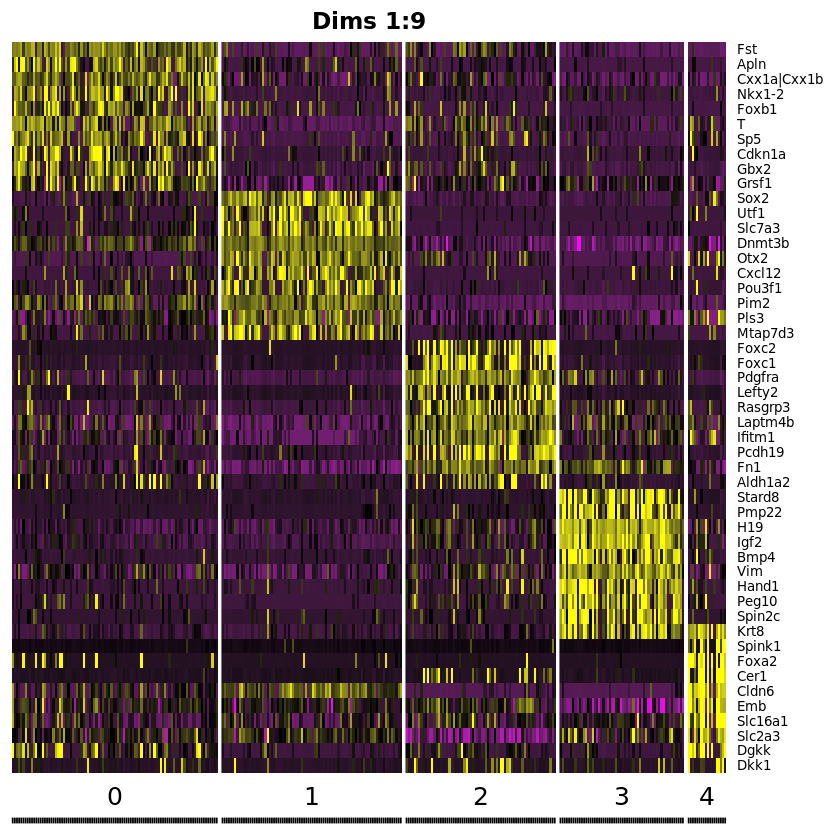

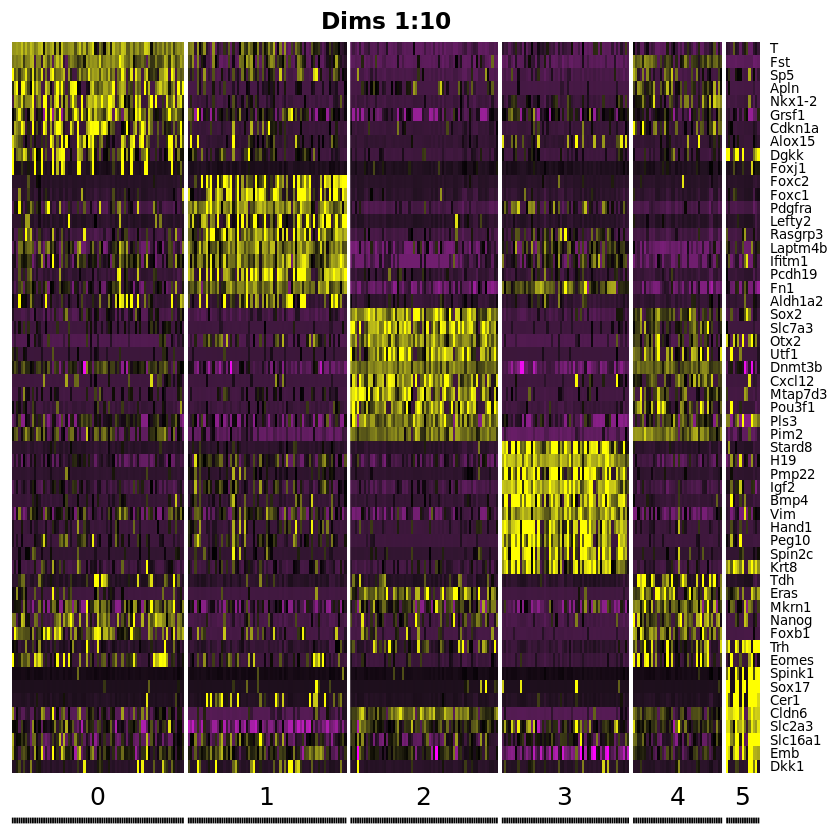

In [33]:
for (lim in limrange){
    markers <- marker_list[[lim]]
    top10 <- markers %>% group_by(cluster) %>% top_n(10, avg_logFC)
    
    print(DoHeatmap(
        object = tsnes_dim[[lim]], 
        genes.use = top10$gene,
        remove.key = TRUE,
        title = paste("Dims 1:", lim, sep=""),
        cex.col = 0,
        cex.row = 8
    ))
}


 What is noticeably confusing here is that T and Eomes seem to share some expression in a t least two clusters, but differ in two others. This is perhaps expected but we need to explore this closer.

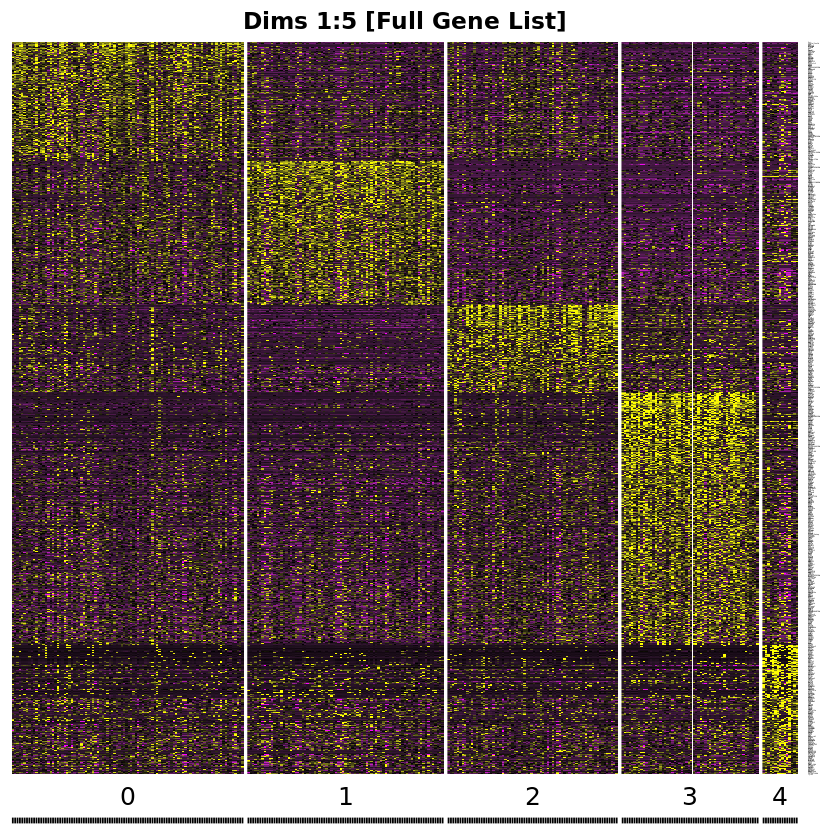

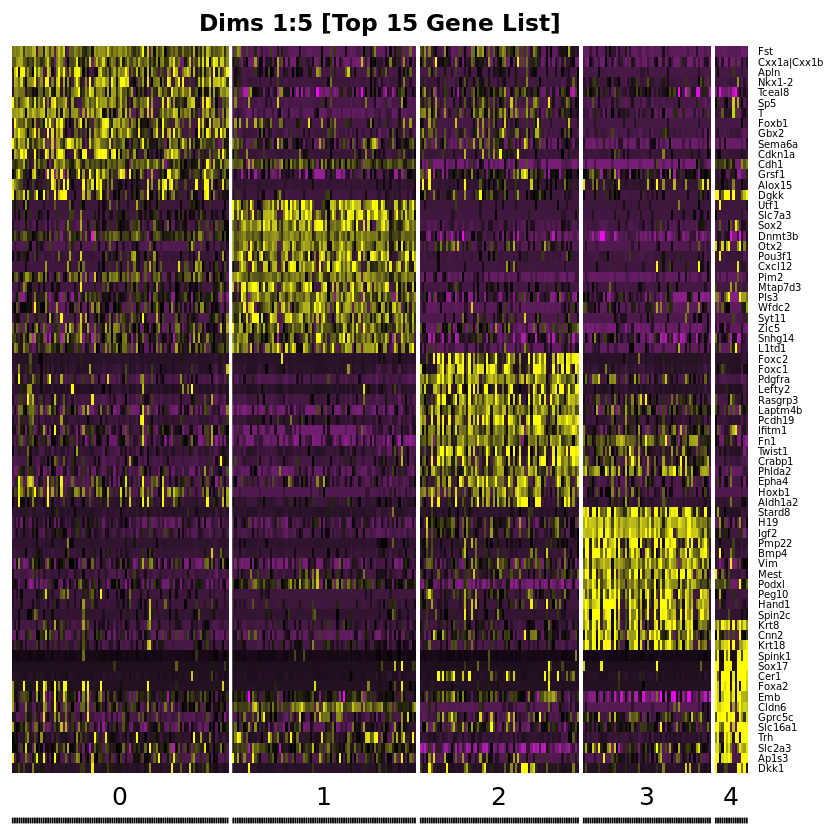

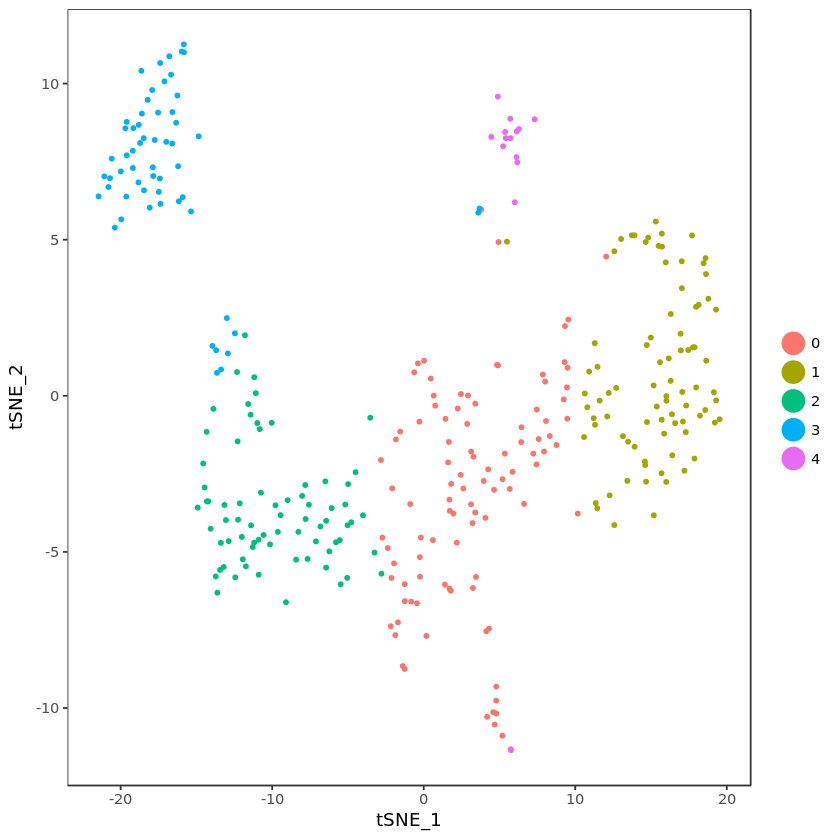

Cluster 0

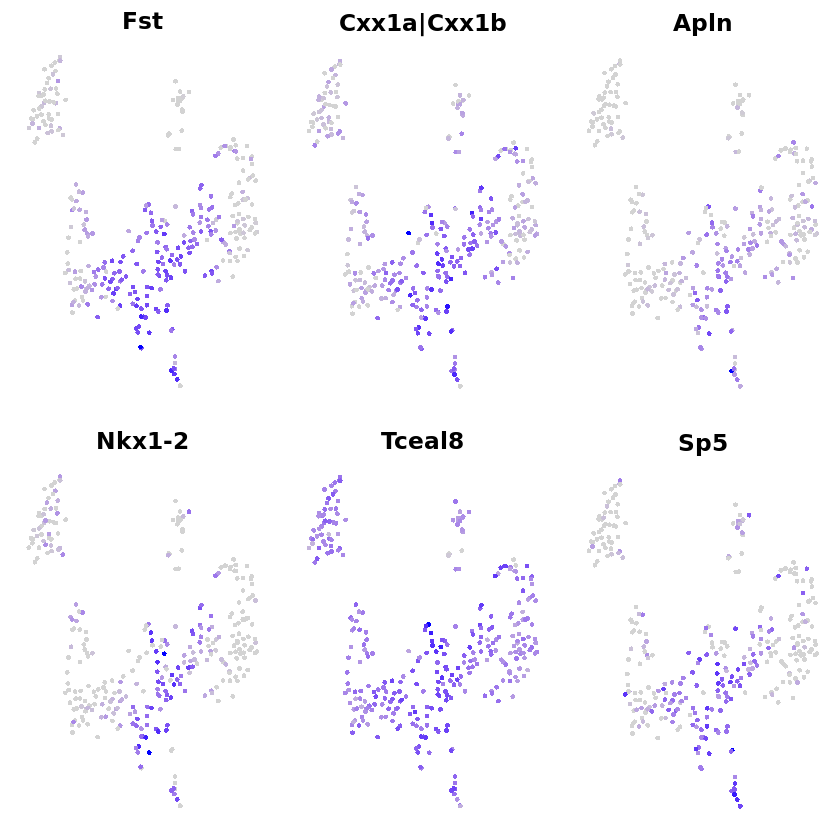

Cluster 1

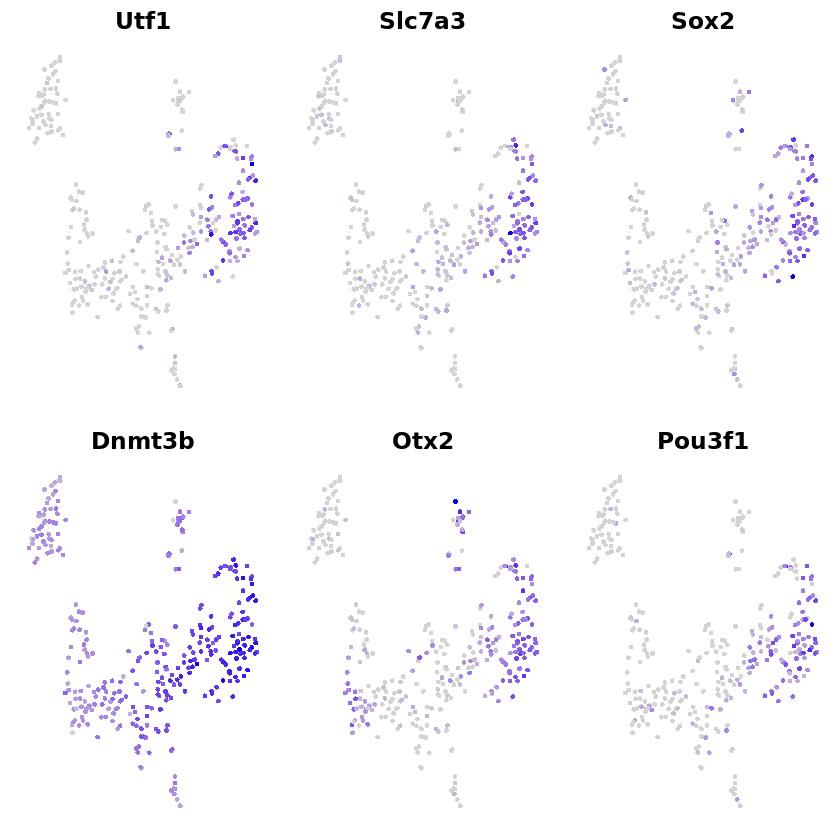

Cluster 2

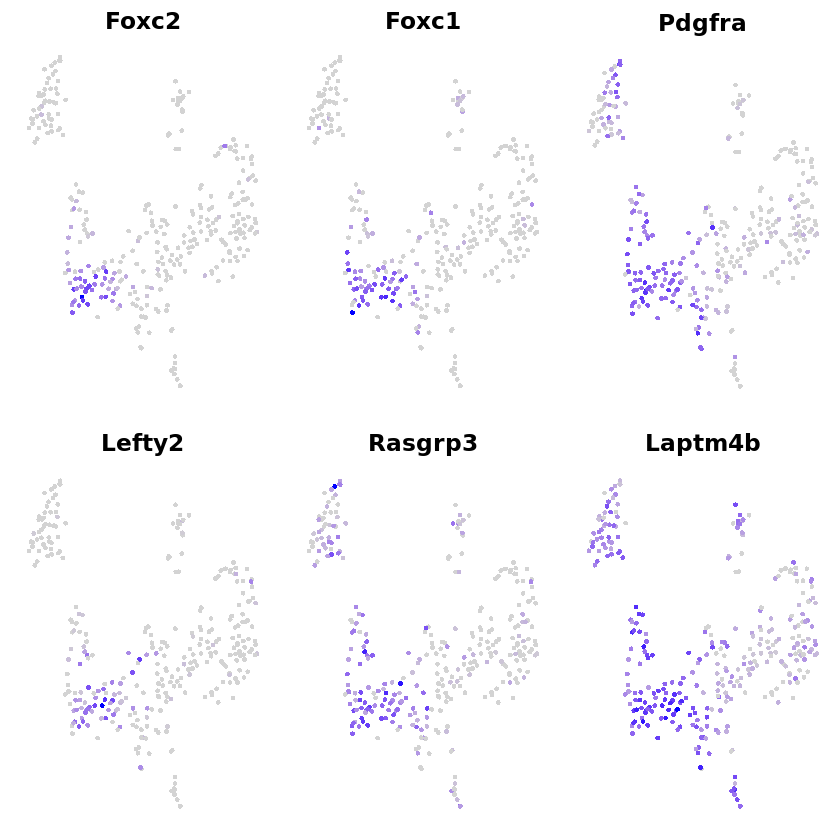

Cluster 3

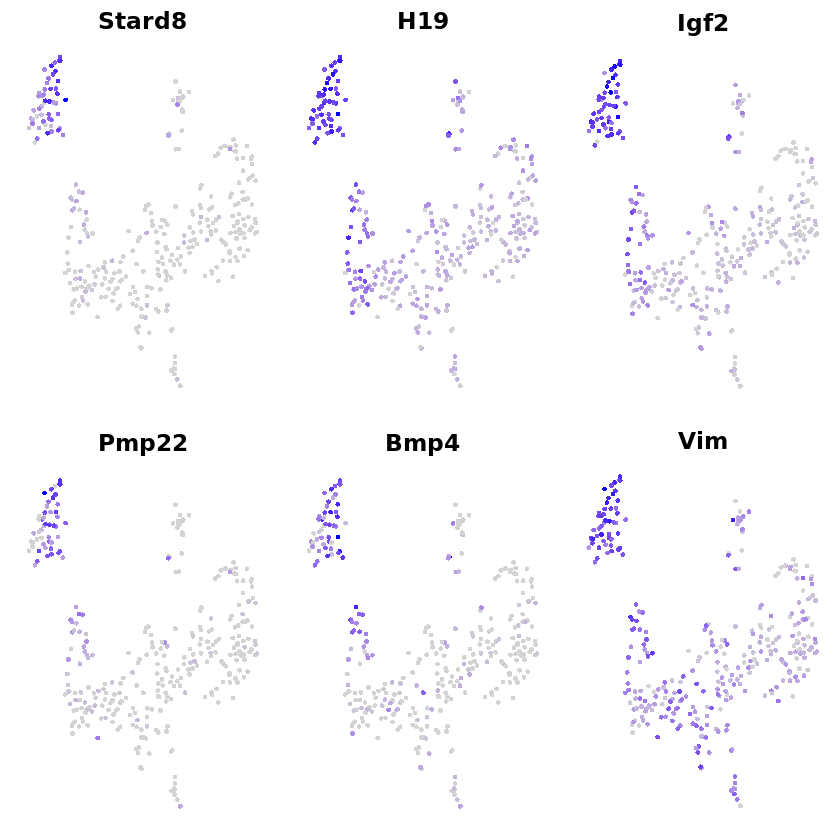

In [34]:
# Looks like dim1:3 is not that distinct
# - Dims 1:5 looks much clearer in clustering
# 
# Let us explore the four main clusters in dim 5
dimm = 5

seu_ob <- tsnes_dim[[dimm]]
mar_ob <- marker_list[[dimm]]
mar_10 <- marker_list[[dimm]] %>% group_by(cluster) %>% top_n(15, avg_logFC)

DoHeatmap(
    object = seu_ob, 
    genes.use = mar_ob$gene,
    remove.key = TRUE,
    title = paste("Dims 1:", dimm, " [Full Gene List]", sep=""),
    cex.col = 0,
    cex.row = 1
)

DoHeatmap(
    object = seu_ob, 
    genes.use = mar_10$gene,
    remove.key = TRUE,
    title = paste("Dims 1:", dimm, " [Top 15 Gene List]", sep=""),
    cex.col = 0,
    cex.row = 6
)


TSNEPlot(object = seu_ob)

for (r in 0:3){      
    FeaturePlot(
        seu_ob, 
        head(mar_10[mar_10$cluster == r,]$gene),
        cols.use = c("lightgrey", "blue"),
        no.axes = T,
        nCol = 3,
    )
    cat("Cluster", r)
}

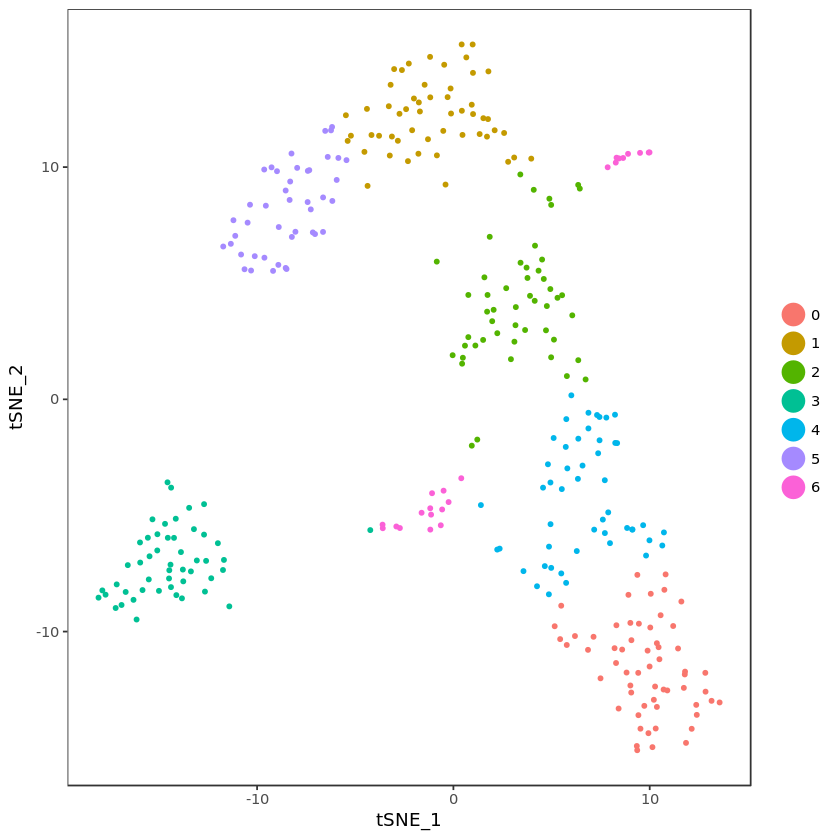

Cluster 0

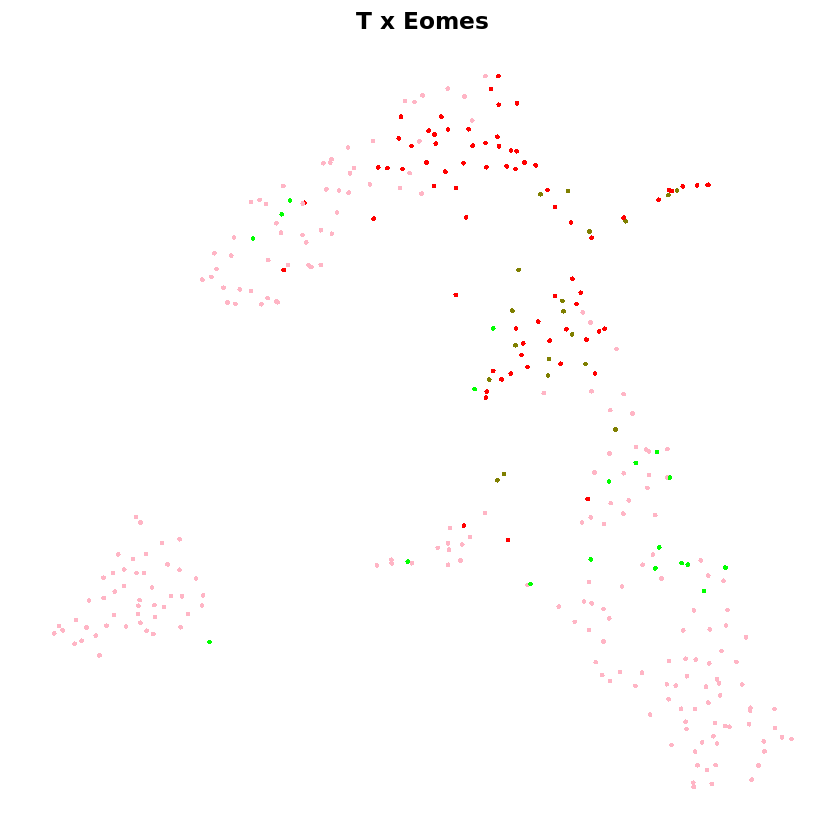

Cluster 1

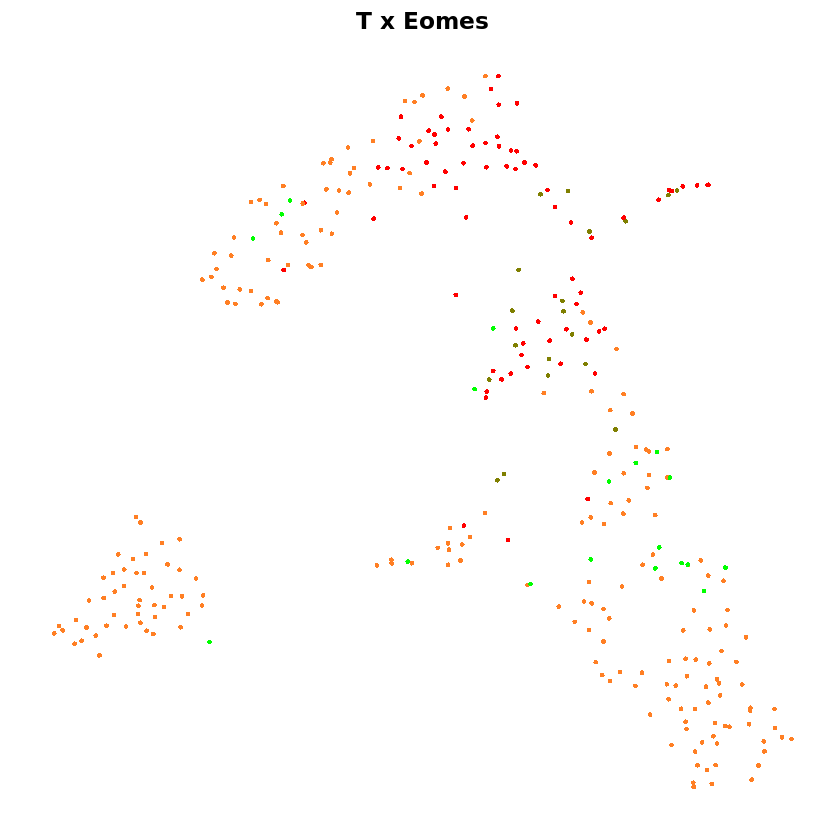

Cluster 2

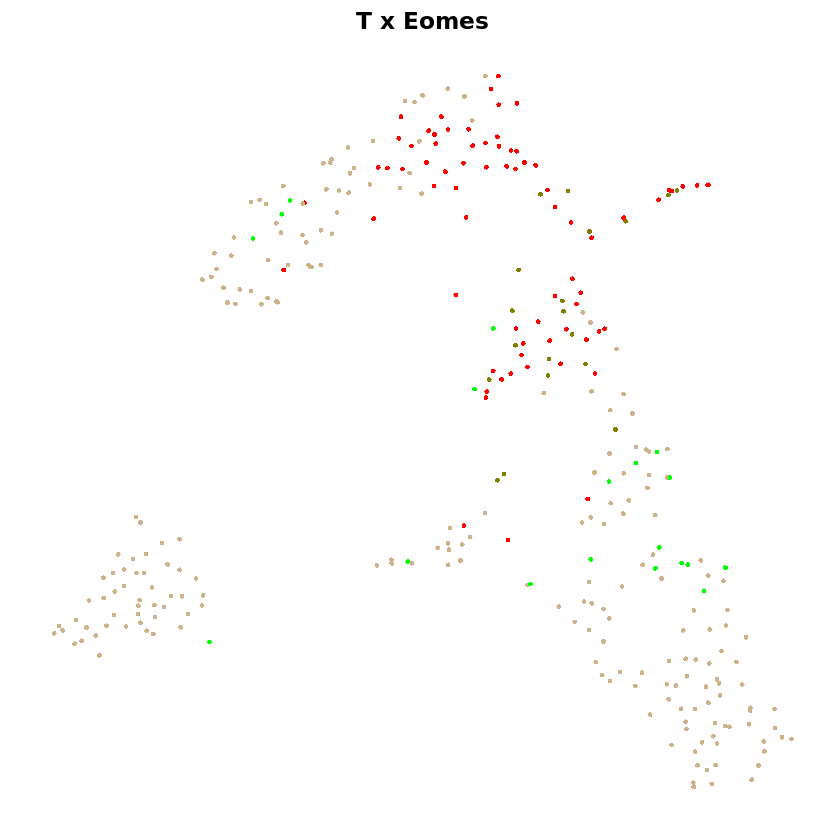

Cluster 3

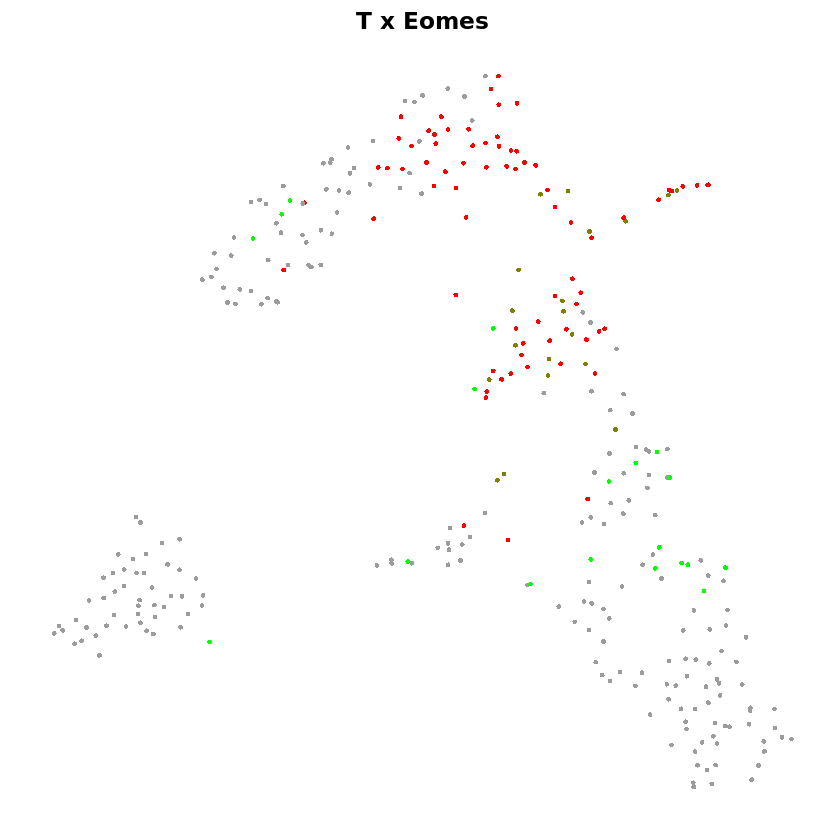

Cluster 4

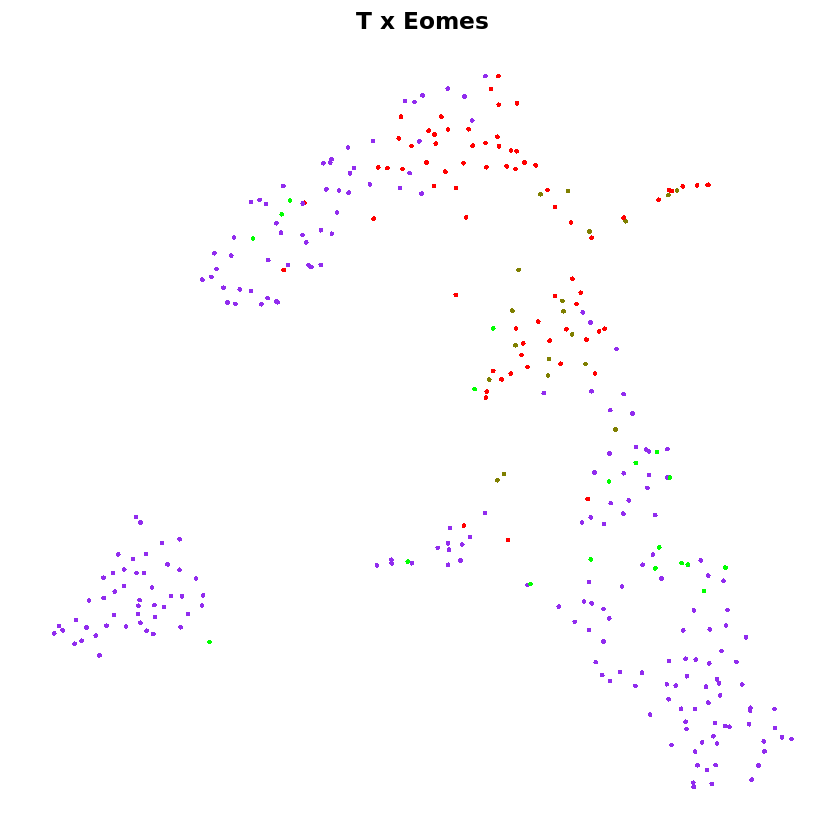

Cluster 5

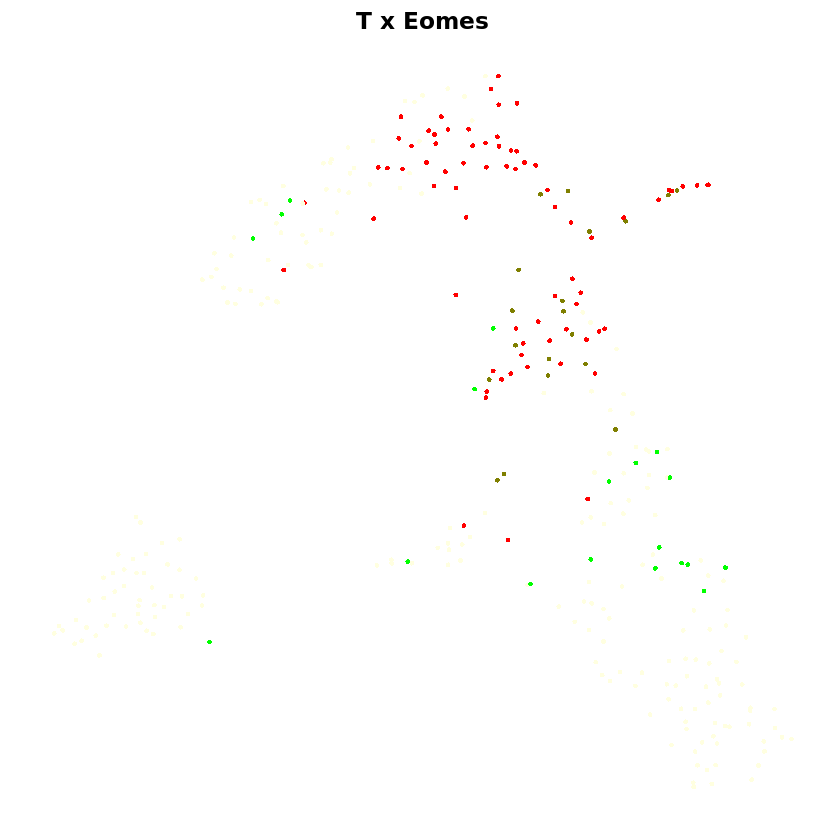

Cluster 6

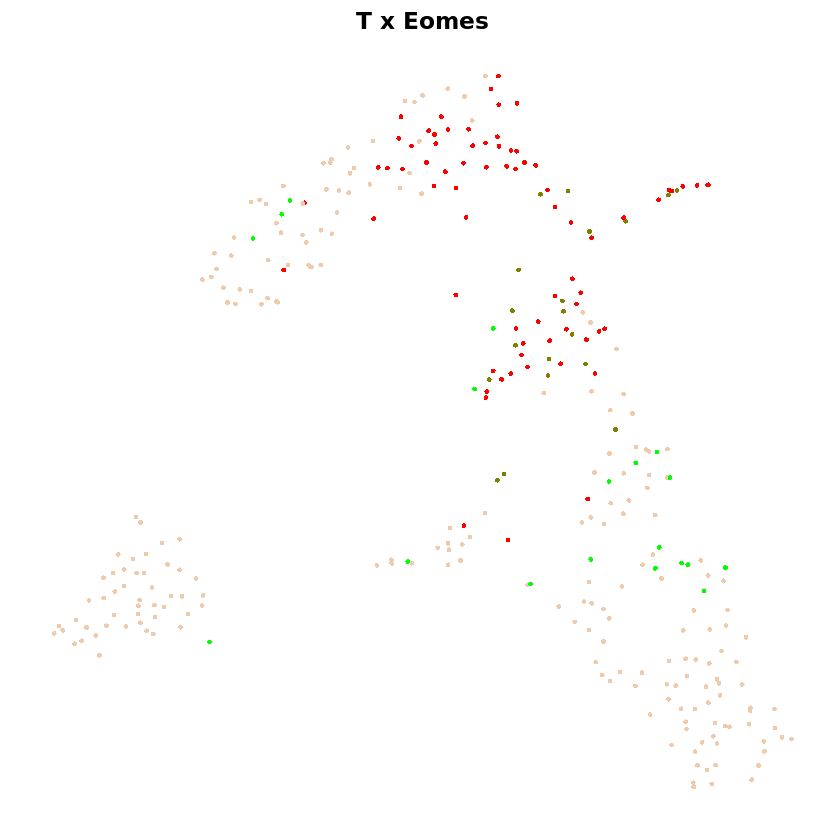

In [64]:
# Let's look at T vs Eomes and where they overlap
seu <- tsnes_dim[[3]]

TSNEPlot(object = seu)

for (r in sort(unique(seu@ident))){      
    FeaturePlot(
        seu, 
        c("T","Eomes"),
        cols.use = c("red", "green"),
        overlay = T,
        no.axes = T
    )
    cat("Cluster", r)
}

In [265]:
# Let's look for topoligcal domains assosciated with each cluster
#
#
# TOMORROW REBUILD THIS FROM HERE
# - We are trying to find features that are unique to each cluster

mar_10 <- marker_list[[dimm]] %>% group_by(cluster) %>% top_n(15, avg_logFC)
genes_of_interest <- mar_10[,c("gene","cluster")]

In [267]:
# Now we will perform gene labelling to see if we have any mitochondrial genes or other 
## NOTE: If you want to skip pulling data straight from the internet you can skip to the next part and just load K from disk
suppressWarnings(require(biomaRt))
# Annotate the data before adding SC experiment

mart <- useMart(biomart = "ENSEMBL_MART_ENSEMBL", 
                dataset = "mmusculus_gene_ensembl")

k <- getBM(
    filters = "mgi_symbol",
    attributes = c(
            "mgi_symbol",
#            "external_transcript_name",     # Transcript-specific name
#            "gene_biotype",                 # Gene biotype
#            "transcript_biotype",           # Trans type
            "description",                  # Gene description
#            "band",                         # Karyotype band
#            "refseq_mrna",
#            "go_id",                        # Go Term accession (cellular domains)
#            "go_linkage_type",              # Go Term evidence code
            "name_1006",                    # Go Term name
#            "definition_1006",              # Go Term definition
            "namespace_1003"                # Go domain                  
    ),
    values = unique(genes_of_interest$gene),
    mart = mart
)

ERROR: Error in listMarts(host = host, path = path, port = port, includeHosts = TRUE, : Unexpected format to the list of available marts.
Please check the following URL manually, and try ?listMarts for advice.
http://www.ensembl.org:80/biomart/martservice?type=registry&requestid=biomaRt


In [102]:
kk <- unique(k[,c("mgi_symbol","name_1006")])
kk_nest <- kk %>% nest(name_1006)

In [104]:
# Now merge
ass <- merge(genes_of_interest, kk_nest, by.x = "gene", by.y = "mgi_symbol")

In [105]:
head(ass)

gene    cluster
1 Aldh1a2 2      
2 Alox15  0      
3 Ap1s3   4      
4 Apln    0      
5 Bmp4    3      
6 Cdh1    0      
  data                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [247]:
# Find unique and defining (>2 occurences) of genes within clusters 

findCommonFeaturesInCluster <- function(clust_num, filt = 2){
    # Perform intersection of all data/ontologies within the same cluster
    ccc <- unlist(ass[ass$cluster == clust_num,]$data)
    ccc <- ccc[!grepl("^$", ccc)]
    names(ccc) <- NULL
    tab <- table(ccc)
    if(length(tab)==0){
        return(NULL)
    }
    tab <- cbind(clust_num, data.frame(tab[tab > filt]))
    colnames(tab) <- c("Cluster", "Feature", "Freq")
    tab <- tab[order(-tab$Freq, tab$Feature),]
    rownames(tab) <- NULL
    return(tab)    
}


In [264]:
genes_of_interest

gene        cluster
1  Fst         0      
2  Cxx1a|Cxx1b 0      
3  Apln        0      
4  Nkx1-2      0      
5  Tceal8      0      
6  Sp5         0      
7  T           0      
8  Foxb1       0      
9  Gbx2        0      
10 Sema6a      0      
11 Cdkn1a      0      
12 Cdh1        0      
13 Grsf1       0      
14 Alox15      0      
15 Dgkk        0      
16 Utf1        1      
17 Slc7a3      1      
18 Sox2        1      
19 Dnmt3b      1      
20 Otx2        1      
21 Pou3f1      1      
22 Cxcl12      1      
23 Pim2        1      
24 Mtap7d3     1      
25 Pls3        1      
26 Wfdc2       1      
27 Syt11       1      
28 Zic5        1      
29 Snhg14      1      
30 L1td1       1      
⋮  ⋮           ⋮      
46 Stard8      3      
47 H19         3      
48 Igf2        3      
49 Pmp22       3      
50 Bmp4        3      
51 Vim         3      
52 Mest        3      
53 Podxl       3      
54 Peg10       3      
55 Hand1       3      
56 Spin2c      3      
57 Krt8        3      
58 Cnn2        3      
59 Krt18       3      
60 Phlda2      3      
61 Spink1      4      
62 Sox17       4      
63 Cer1        4      
64 Foxa2       4      
65 Emb         4      
66 Cldn6       4      
67 Gprc5c      4      
68 Slc16a1     4      
69 Trh         4      
70 Krt8        4      
71 Slc2a3      4      
72 Krt18       4      
73 Ap1s3       4      
74 Dgkk        4      
75 Dkk1        4

In [268]:
filt_thresh <- 4
running_table <- NULL

for (cl in sort(unique(seu@ident))){
    running_table <- rbind(running_table,
           findCommonFeaturesInCluster(cl,filt_thresh)
    )
}



In [269]:
running_table

Cluster Feature                                    Freq
1  0       nucleus                                    7   
2  0       protein binding                            6   
3  0       regulation of transcription, DNA-templated 6   
4  0       cytoplasm                                  5   
5  0       DNA binding                                5   
6  0       sequence-specific DNA binding              5   
7  0       transcription, DNA-templated               5   
8  1       cytoplasm                                  6   
9  1       protein binding                            6   
10 1       nucleus                                    5   
11 2       multicellular organism development         7   
12 2       cytoplasm                                  6   
13 2       membrane                                   6   
14 2       integral component of membrane             5   
15 2       nucleus                                    5   
16 2       plasma membrane                            5   
17 3       cytoplasm                                  7   
18 3       protein binding                            7   
19 3       nucleus                                    5   
20 4       protein binding                            8   
21 4       plasma membrane                            7   
22 4       membrane                                   6   
23 4       cytoplasm                                  5   
24 4       integral component of membrane             5   
25 4       nucleus                                    5